#<font color = 'Orange'>Scraping page</font>
You need to scrape the phones with their price from: https://mobelix.com.mk/mk/mobilni-telefoni

The informations you need to extract are:


*   Phone brand: html tag (\<h5 class="mb-0">\)
*   Phone type: html tag (\<h3 class="h5 font-weight-normal">\)
*   Phone pruce: html tag (\<p class="h5 price">\)



# <font color='Orange'>Requirements specified for Web Scraping</font> (0.1 POINTS)


Import all libraries and modules that you are going to use.

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
requests.packages.urllib3.disable_warnings()

import warnings
warnings.filterwarnings("ignore")

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> (0.3 POINTS)


 **Fetch a website's content - send request**

In [3]:
snapshot_url = ' https://mobelix.com.mk/mk/mobilni-telefoni'

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [4]:
snapshot = requests.get(snapshot_url)
print(snapshot)

<Response [200]>


# <font color = 'orange'>Parse the HTML with BeautifulSoup</font> (0.3 POINTS)

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.


**Parse using BeautifulSoap**




In [5]:
raw_html = snapshot.text
raw_html
soup = BeautifulSoup(raw_html,'html.parser')
soup.select_one("title")


<title>Мобилни телефони | Mobelix Premium Mobilara</title>

**Print the HTML code that you get**

In [6]:
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<title>Мобилни телефони | Mobelix Premium Mobilara</title>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" name="title"/>
<meta content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др." name="description"/>
<meta content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni" name="keywords"/>
<meta content="Mobelix Премиум Мобилара" property="og:site_name">
<meta content="http://mobelix.com.mk/mk/mobilni-telefoni" property="og:url">
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" p

# <font color='Orange'>Extracting data</font> (0.7 POINTS)

From the printed HTML code search for the data you need for building the dataset, by the classes that are given above in the html tags listed.



**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [7]:

phone_brand = soup.select("h5.mb-0")
phone_brand


[<h5 class="mb-0">Blackberry</h5>,
 <h5 class="mb-0">Samsung</h5>,
 <h5 class="mb-0">Samsung</h5>,
 <h5 class="mb-0">Apple</h5>,
 <h5 class="mb-0">Apple</h5>,
 <h5 class="mb-0">Apple</h5>,
 <h5 class="mb-0">Apple</h5>,
 <h5 class="mb-0">Apple</h5>,
 <h5 class="mb-0">Apple</h5>]

**Add as many codeboxes as you need for selecting all the html elements**

In [8]:
phone_type = soup.select("h3.h5.font-weight-normal")
phone_price=soup.select("p.h5.price")
price=[]
for i in range(0,len(phone_price)):
  del_el=phone_price[i].text
  br_element=phone_price[i].find('br')
  if br_element:
    text_after=br_element.next_sibling
    price.append(text_after)
  else:
    price.append(del_el)

currency_remove = "ден"    
filtered_values = [re.sub(r'\s*' + currency_remove, '', value) for value in price]
float_values = []
for value in filtered_values:
    match = re.search(r'[-+]?\d*\.\d+|\d[\d,]*', value)
    if match:
        numeric_value = match.group()
        numeric_value = numeric_value.replace(',', '')  
        numeric_value = numeric_value.lstrip('0')  
        if numeric_value:  
            float_values.append(float(numeric_value))

float_values



[19000.0, 8300.0, 8300.0, 61500.0, 89200.0, 78100.0, 98400.0, 55300.0, 46800.0]

**Create lists with the extracted data from the html elements that you selected**

In [9]:
brand = []
for i in phone_brand:
  brand.append(i.text)

typpe = []
for i in phone_type:
  typpe.append(i.text)



**Print all lists that are containing the elements**

In [10]:
print(brand)
print(typpe)
print(float_values)

['Blackberry', 'Samsung', 'Samsung', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple']
['Porsche Design P9981', 'Galaxy A03s 4/64GB', 'Galaxy A04s 3/32GB', 'iPhone 14 Pro Max 128GB E-SIM', 'iPhone 14 Pro 512GB', 'iPhone 14 Pro Max 512GB', 'iPhone 14 Pro Max 1TB', 'iPhone 14 Pro 128GB E-SIM', 'iPhone 13 Mini 256GB']
[19000.0, 8300.0, 8300.0, 61500.0, 89200.0, 78100.0, 98400.0, 55300.0, 46800.0]


**Check if all lists are the same size**

In [11]:
len(brand) == len(typpe) == len(float_values)

True

# <font color='Orange'>Create a Pandas DataFrame</font> (0.1 POINTS)


**Create the DataFrame from the lists you get and name your *Columns***

In [12]:
matrix = []
for i in range(0,len(phone_brand)):
  matrix.append([brand[i],typpe[i],float_values[i]])

df = pd.DataFrame(np.array(matrix),columns = ["Brand", "Model", "Price"])

**Print the dataset you obtain**

In [13]:
df

,Brand,Model,Price
0,Blackberry,Porsche Design P9981,19000.0
1,Samsung,Galaxy A03s 4/64GB,8300.0
2,Samsung,Galaxy A04s 3/32GB,8300.0
3,Apple,iPhone 14 Pro Max 128GB E-SIM,61500.0
4,Apple,iPhone 14 Pro 512GB,89200.0
5,Apple,iPhone 14 Pro Max 512GB,78100.0
6,Apple,iPhone 14 Pro Max 1TB,98400.0
7,Apple,iPhone 14 Pro 128GB E-SIM,55300.0
8,Apple,iPhone 13 Mini 256GB,46800.0


#<font color='orange'>EDA</font> (0.2 POINTS)

## <font color='Orange'>Find statistic elements for the prices</font>
Like mean, median,  standard deviation, minimum, maximum

In [14]:
df.Price.min()
df.Price.max()
df.Price.median()



55300.0

# <font color = 'Orange'>Data visualization </font> (0.3 POINTS)

Make a histogram & bar chart for the price values

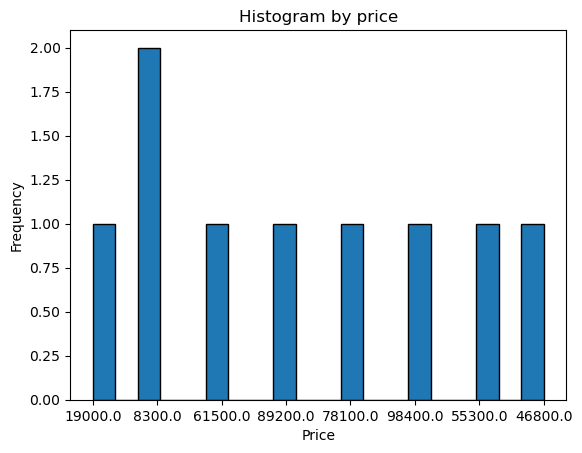

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df.Price,bins=20,edgecolor = 'k')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram by price')
plt.show()